In [10]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
x_train = sparse.load_npz("X_train.npz")
x_test = sparse.load_npz("X_test.npz")
y_train = np.load("Y_train.npy")
y_test = np.load("Y_test.npy")


In [12]:
param_grid = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)


In [13]:
grid.fit(x_train,y_train)
best_model = grid.best_estimator_
print(grid.best_estimator_)

KNeighborsRegressor(metric='manhattan', n_neighbors=9, weights='distance')


In [ ]:
# KNeighborsRegressor(metric='manhattan', n_neighbors=9, weights='distance')

In [14]:
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)

0.7225554756690876 -0.07905537856173295


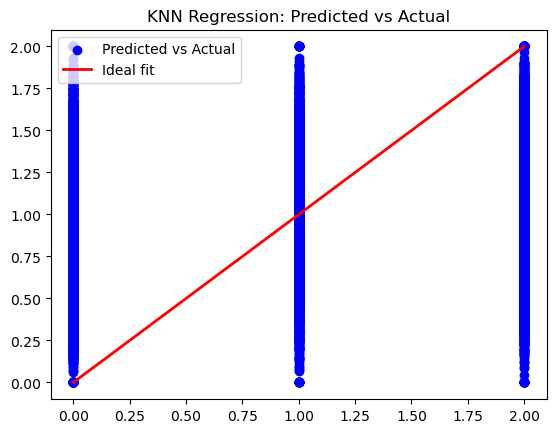

In [17]:
# Visualize the results

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.legend()
plt.show()